# Comparing performance of spec2vec in relation with Tanimoto in different percentiles

The following space dimensionalities were used: 2, 50, 100, 300, 500, 600, 650, 700, 750, 800, 100 and 1200.

The diagonal is ignored every time the percentile value is obtained.

In [2]:
import os
import sys

ROOT = os.path.dirname(os.getcwd())
sys.path.insert(0, ROOT)

In [3]:
from custom_functions.spectra_functions import get_data_folder_path

path = get_data_folder_path()

### Loading Tanimoto similarity and computing top 1st percentile

In [6]:
import numpy as np

filename = os.path.join(path,'similarities_filter05_cosine_tol05_mzp3_intp06.npy')
matrix_similarities_nist = np.load(filename)

In [7]:
filename = os.path.join(path, "gcms_similarities_filter05_morgan3_2048_dice.npy")
matrix_similarities_tanimoto = np.load(filename)

In [8]:
from custom_functions.plotting_functions import plot_precentile

show_top_percentile = 0.01

percentile_cosine_nist = plot_precentile(matrix_similarities_tanimoto, matrix_similarities_nist, show_top_percentile=show_top_percentile, title="Cosine NIST Top Percentil Comparison", ignore_diagonal=True)


### Loading Cosine Massbank similarity matrix and computing top 1st percentile

In [9]:
filename = os.path.join(path,'similarities_filt05_cosine_tol05_mzp2_intp05.npy')
matrix_similarities_massbank = np.load(filename)

percentile_cosine_massbank = plot_precentile(matrix_similarities_tanimoto, matrix_similarities_massbank, show_top_percentile=show_top_percentile, title="Cosine MassBank Top Percentil Comparison", ignore_diagonal=True)


### Loading Cosine Demuth similarity matrix and computing top 1st percentile

In [10]:
filename = os.path.join(path,'similarities_filt05_cosine_tol05_mzp0_intp033.npy')
matrix_similarities_demuth = np.load(filename)

percentile_cosine_demuth = plot_precentile(matrix_similarities_tanimoto, matrix_similarities_demuth, show_top_percentile=show_top_percentile, title="Cosine Demuth Top Percentil Comparison", ignore_diagonal=True)


### Loading Spec2Vec similarity matrice of 20 iterations and computing top 1st percentile

Spec2Vec similarity score was computed 20 times previously with space dimensions 2, 50, 100, 300, 500, 600, 650, 700, 750, 800, 100 and 1200.
Here those matrices are loaded, so the 1st percentile can be computed for each.

In [17]:
top_percentile_iterations = []
for i in range(20):
    filename = os.path.join(path, "similarities_filter05_spec2vec_2_it{:d}_size300.npy".format(i+1))
    matrix_similarities_spec2vec = np.load(filename)
    top_percentile_iterations.append(plot_precentile(matrix_similarities_tanimoto, matrix_similarities_spec2vec, show_top_percentile=show_top_percentile, title="Spec2vec Top Percentil Comparison", ignore_diagonal=True))
top_percentile_iterations = np.array(top_percentile_iterations)

array([0.63845101, 0.63863965, 0.63877983, 0.63897362, 0.63916692,
       0.63916655, 0.63922331, 0.6394008 , 0.63960971, 0.63994372,
       0.64017164, 0.640322  , 0.64034315, 0.64055354, 0.64061502,
       0.64082612, 0.64086401, 0.64097698, 0.64109013, 0.64130735,
       0.64135756, 0.64165541, 0.64181408, 0.64199006, 0.64222624,
       0.64243964, 0.64229952, 0.64246898, 0.64269698, 0.6426726 ,
       0.64284004, 0.64303846, 0.64317489, 0.64357818, 0.64354813,
       0.64353141, 0.64372959, 0.64397198, 0.64398606, 0.64412212,
       0.6443459 , 0.64449192, 0.64466383, 0.64475621, 0.64488262,
       0.64505522, 0.64518802, 0.64549544, 0.64559648, 0.64580487,
       0.64587592, 0.64624297, 0.6463727 , 0.64644907, 0.6466413 ,
       0.64662659, 0.6468579 , 0.64693098, 0.64708028, 0.64742596,
       0.64763785, 0.64759647, 0.64756172, 0.64782963, 0.64814817,
       0.64804452, 0.6481888 , 0.64829897, 0.64833059, 0.64835019,
       0.64821811, 0.64826911, 0.64828437, 0.64853097, 0.64864

### Plotting the performance of Spec2Vec 20 times in all space dimensions previously mentioned

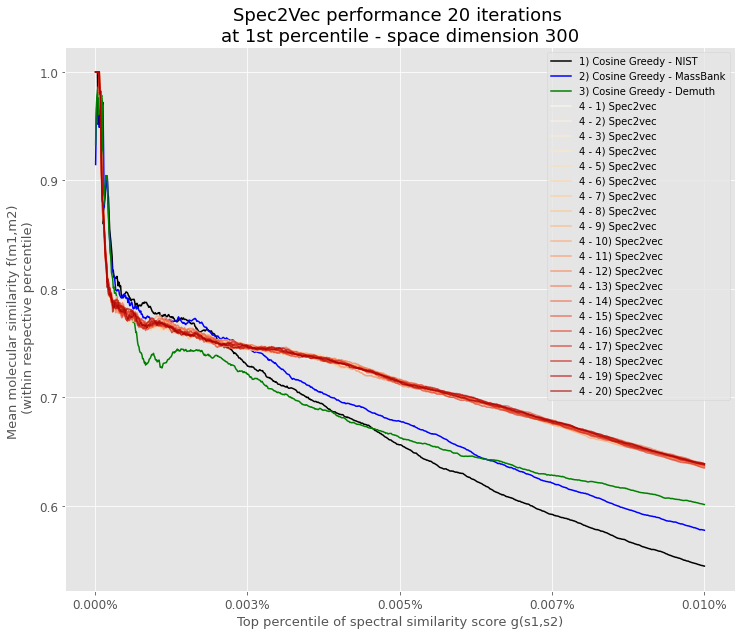

In [64]:
## Code inspired by Florian Huber's jupyter notebook to plot a graph comparing all similarity meaasures
## https://github.com/iomega/spec2vec_gnps_data_analysis/blob/master/notebooks/iomega-7-compare-the-different-scores.ipynb

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
cm = plt.get_cmap('OrRd')
cNorm  = colors.Normalize(vmin=0, vmax=1)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)

num_bins = 1000

plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(12,10))
plt.title("Spec2Vec performance 20 iterations \nat 1st percentile - space dimension 300", fontsize=18)

x_percentiles = (show_top_percentile / num_bins * (1 + np.arange(num_bins)))[::-1]

plt.plot(x_percentiles, percentile_cosine_nist,
         color="black", label="1) Cosine Greedy - NIST")
plt.plot(x_percentiles, percentile_cosine_massbank,
         color="blue", label="2) Cosine Greedy - MassBank")
plt.plot(x_percentiles, percentile_cosine_demuth,
         color="green", label="3) Cosine Greedy - Demuth")

for k, percentile_cosine_spec2vec in enumerate(top_percentile_iterations):
    color_code = scalarMap.to_rgba(k/(len(top_percentile_iterations)+1))
    plt.plot(x_percentiles, percentile_cosine_spec2vec, alpha=0.7,
             color=color_code, label="4 - {:d}) Spec2vec".format(1+k))

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(np.linspace(0, show_top_percentile, 5), 
          ["{:.3f}%".format(x) for x in np.linspace(0, show_top_percentile, 5)])
plt.legend()
plt.xlabel("Top percentile of spectral similarity score g(s1,s2)", fontsize=13)
plt.ylabel("Mean molecular similarity f(m1,m2) \n (within respective percentile)", fontsize=13)
plt.show()
